In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import math
from scipy.stats.mstats import winsorize

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1500)

In [3]:
df=pd.read_csv('missing_scout_auto.csv')

In [4]:
df.head(3)

,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,Gearing Type,hp,Consumption_comb,Consumption_city,Consumption_country,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras,Upholstery_type,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,CO2 Emission,Gears
0,Audi A1,Sedans,15770,3.0,56013.0,Diesel,Used,2.0,Black,Metallic,Automatic,66.0,3.8,4.3,3.5,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, On-board comp...","ABS, Central door lock, Daytime running lights...","Alloy wheels, Catalytic Converter, Voice Control",Cloth,Black,VAT deductible,5.0,5.0,1422.0,3.0,1220.00000,front,99.0,7.0
1,Audi A1,Sedans,14500,2.0,80000.0,Benzine,Used,1.0,Red,Metallic,Automatic,141.0,5.6,7.0,4.7,"Air conditioning, Automatic climate control, H...","Bluetooth, Hands-free equipment, On-board comp...","ABS, Central door lock, Central door lock with...","Alloy wheels, Sport seats, Sport suspension, V...",Cloth,Grey,Price negotiable,3.0,4.0,1798.0,4.0,1255.00000,front,129.0,7.0
2,Audi A1,Sedans,14640,3.0,83450.0,Diesel,Used,1.0,Black,Metallic,Automatic,85.0,3.8,4.4,3.4,"Air conditioning, Cruise control, Electrical s...","MP3, On-board computer","ABS, Central door lock, Daytime running lights...","Alloy wheels, Voice Control",Cloth,Black,VAT deductible,4.0,4.0,1598.0,4.0,1257.35941,front,99.0,7.0


In [5]:
df.shape

(14376, 30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14376 entries, 0 to 14375
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_model            14376 non-null  object 
 1   body_type              14376 non-null  object 
 2   price                  14376 non-null  int64  
 3   age                    14376 non-null  float64
 4   km                     14376 non-null  float64
 5   Fuel                   14376 non-null  object 
 6   Type                   14376 non-null  object 
 7   prev_owner             14376 non-null  float64
 8   Body Color             14376 non-null  object 
 9   Paint Type             14376 non-null  object 
 10  Gearing Type           14376 non-null  object 
 11  hp                     14376 non-null  float64
 12  Consumption_comb       14376 non-null  float64
 13  Consumption_city       14376 non-null  float64
 14  Consumption_country    14376 non-null  float64
 15  Co

In [7]:
df.isnull().sum()

brand_model              0
body_type                0
price                    0
age                      0
km                       0
Fuel                     0
Type                     0
prev_owner               0
Body Color               0
Paint Type               0
Gearing Type             0
hp                       0
Consumption_comb         0
Consumption_city         0
Consumption_country      0
Comfort & Convenience    0
Entertainment & Media    0
Safety & Security        0
Extras                   0
Upholstery_type          0
Upholstery_color         0
vat                      0
Nr. of Doors             0
Nr. of Seats             0
Displacement             0
Cylinders                0
Weight                   0
Drive chain              0
CO2 Emission             0
Gears                    0
dtype: int64

In [8]:
df.select_dtypes('number').iloc[np.random.randint(0,1000,50)]

,price,age,km,prev_owner,hp,Consumption_comb,Consumption_city,Consumption_country,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,CO2 Emission,Gears
583,12900,3.0,64000.000000,1.0,66.0,3.4,3.9,3.0,5.0,5.0,1422.0,3.0,1195.000000,91.0,5.0
564,12736,3.0,17100.000000,2.0,70.0,4.4,5.2,3.9,3.0,4.0,1395.0,3.0,1173.450766,104.0,5.0
190,17900,1.0,12260.000000,1.0,85.0,4.0,4.6,3.6,5.0,4.0,1598.0,4.0,1275.000000,105.0,7.0
773,13950,3.0,50000.000000,1.0,66.0,3.7,4.2,3.4,5.0,4.0,1422.0,3.0,1195.000000,97.0,5.0
391,12900,3.0,62400.000000,1.0,66.0,3.7,4.2,3.4,4.0,5.0,1422.0,3.0,1257.359410,97.0,5.0
922,20900,2.0,14270.000000,1.0,71.0,4.2,5.0,3.7,5.0,5.0,1395.0,4.0,1257.359410,102.0,7.0
453,13680,3.0,15100.000000,2.0,60.0,4.2,5.0,3.7,5.0,5.0,1395.0,3.0,1257.359410,97.0,5.0
975,19900,1.0,11100.000000,1.0,85.0,4.0,4.6,3.6,5.0,4.0,1598.0,4.0,1257.359410,105.0,7.0
202,16900,3.0,67790.000000,2.0,66.0,4.0,4.4,3.7,3.0,5.0,1422.0,4.0,1165.000000,104.0,6.0
111,18900,1.0,31877.000000,1.0,70.0,4.5,5.4,3.8,5.0,5.0,1395.0,3.0,1165.000000,103.0,7.0


### Since we are going to handle outliers, we  will look up the numerical values

In [9]:
 df.select_dtypes('number').columns


Index(['price', 'age', 'km', 'prev_owner', 'hp', 'Consumption_comb', 'Consumption_city', 'Consumption_country', 'Nr. of Doors', 'Nr. of Seats', 'Displacement', 'Cylinders', 'Weight', 'CO2 Emission', 'Gears'], dtype='object')

#### The price  is our target column so we will look at that at the end of our analysis 

## Age

In [10]:
df.age.value_counts()
##This column looks numerical but is categorical so we will skip this column.

1.0    4500
0.0    3649
3.0    3326
2.0    2901
Name: age, dtype: int64

## km

In [11]:
df['km'].describe()

count     14376.000000
mean      32397.971080
std       36613.659959
min           0.000000
25%        4221.750000
50%       20812.500000
75%       46298.500000
max      317000.000000
Name: km, dtype: float64

In [12]:
df.groupby(['brand_model', 'body_type','age'])['km'].describe()
## When we look at the data there is no absurd number that we have to delete 
##  but we will look at especially cars zero-year-old  

count           mean           std            min            25%            50%            75%            max
brand_model    body_type     age                                                                                                               
Audi A1        Compact       0.0  295.0    2359.649734   2844.558215       0.000000    1000.000000    1595.891452    2998.000000   14999.000000
                             1.0  259.0   14674.652510   8265.232294     973.000000    7419.500000   13009.000000   21968.500000   33360.000000
                             2.0  132.0   24937.962121  20174.024332    1478.000000   12245.750000   21237.000000   29711.000000  148257.000000
                             3.0  213.0   56262.852669  27904.918360   11300.000000   35367.000000   50200.000000   72624.000000  168000.000000
               Coupe         2.0    1.0   50000.000000           NaN   50000.000000   50000.000000   50000.000000   50000.000000   50000.000000
                             3.0    1.0   27300.000000           NaN   27300.000000   27300.000000   27300.000000   27300.000000   27300.000000
               Other         0.0    8.0    1491.545455   2295.934157      10.000000      10.000000     505.000000    2048.090909    6700.000000
                             1.0    3.0   17076.666667  10960.731423    5300.000000   12125.000000   18950.000000   22965.000000   26980.000000
                             2.0    1.0   22001.000000           NaN   22001.000000   22001.000000   22001.000000   22001.000000   22001.000000
               Sedans        0.0  386.0    1943.392645   2954.390976       0.000000      10.000000     300.000000    2900.000000   18000.000000
                             1.0  453.0   13366.719069   7649.406955       1.000000    7672.000000   12000.000000   18971.000000   47000.000000
                             2.0  261.0   27192.475096  18861.142383      10.000000   14518.000000   21400.000000   35000.000000  115900.000000
                             3.0  359.0   53514.643260  26955.903976    3150.000000   33695.500000   51400.000000   65924.500000  192000.000000
               Station wagon 0.0    2.0    3100.000000   1979.898987    1700.000000    2400.000000    3100.000000    3800.000000    4500.000000
                             1.0   11.0   14513.454545   8664.911510    4150.000000    6911.000000   12000.000000   21117.500000   27749.000000
                             2.0    3.0   20319.000000   8547.911031   10457.000000   17678.500000   24900.000000   25250.000000   25600.000000
                             3.0    5.0   48807.400000  22844.790397   23311.000000   27015.000000   55600.000000   62111.000000   76000.000000
               Van           0.0    1.0    3000.000000           NaN    3000.000000    3000.000000    3000.000000    3000.000000    3000.000000
Audi A2        Off-Road      1.0    1.0   26166.000000           NaN   26166.000000   26166.000000   26166.000000   26166.000000   26166.000000
Audi A3        Compact       0.0   18.0    9142.549525  29701.972047       0.000000       7.000000       8.500000    4588.472863  127022.000000
                             1.0   31.0   16295.822211  13885.880037       7.000000    9887.500000   14700.162850   18862.000000   78000.000000
                             2.0   39.0   44023.384615  23801.514363   18300.000000   26474.500000   37875.000000   50749.000000  149170.000000
                             3.0   59.0   92018.050847  38375.564756      35.000000   69155.000000   94836.000000  112745.000000  217032.000000
               Convertible   1.0    3.0   12388.000000   6426.852418    8364.000000    8682.000000    9000.000000   14400.000000   19800.000000
                             2.0    4.0   22524.750000  23998.528668     468.000000    6740.250000   17415.500000   33200.000000   54800.000000
                             3.0    1.0   37000.000000           NaN   37000.000000   37000.000000   37000.000000   37000.000000   37000.000000
  

In [13]:
df.loc[(df['age']==0)&(df['Type']=='Used'),'km'].describe()

count       760.000000
mean       3847.367789
std        8688.625576
min           1.000000
25%          41.500000
50%        1501.000000
75%        5000.000000
max      127022.000000
Name: km, dtype: float64

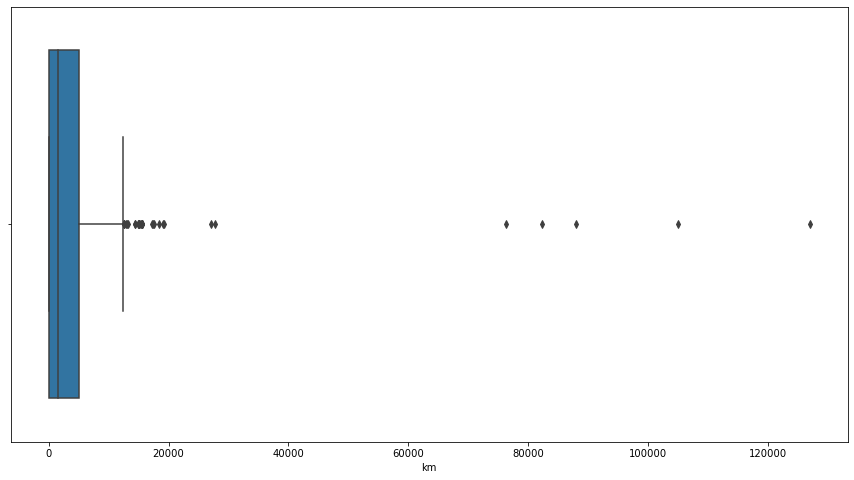

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df.loc[(df['age']==0)&(df['Type']=='Used'),'km']);

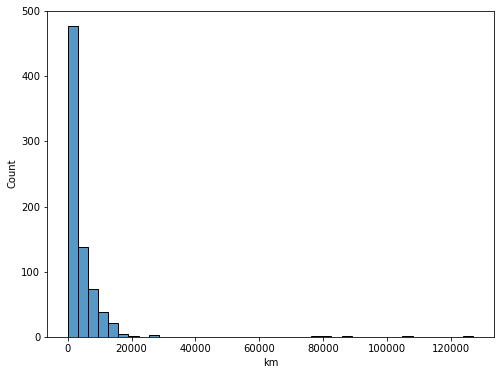

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df.loc[(df['age']==0)&(df['Type']=='Used'),'km'],bins=40,kde=False);

In [16]:
km_tail_index=df.loc[(df['age']==0)&(df['Type']=='Used'),'km'].sort_values().tail(10).index

In [17]:
df.iloc[km_tail_index]

,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,Gearing Type,hp,Consumption_comb,Consumption_city,Consumption_country,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras,Upholstery_type,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,CO2 Emission,Gears
7519,Opel Astra,Station wagon,17970,0.0,18441.0,Benzine,Used,1.0,Brown,Metallic,Manual,110.0,5.5,7.2,4.5,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Alarm system, Central door lock, Daytime ...","Alloy wheels, Roof rack, Sport seats",Cloth,Cloth,VAT deductible,5.0,5.0,1399.0,4.0,1405.030466,front,130.0,6.0
4746,Audi A3,Sedans,26890,0.0,19000.0,Diesel,Used,1.0,Silver,Metallic,Automatic,85.0,4.0,4.6,3.7,"Air conditioning, Automatic climate control, C...","Bluetooth, CD player, MP3, On-board computer, ...","Electronic stability control, Fog lights, LED ...",Alloy wheels,Full leather,Grey,VAT deductible,5.0,5.0,1598.0,3.0,1401.277551,front,106.0,7.0
7020,Opel Astra,Station wagon,26900,0.0,19200.0,Benzine,Used,1.0,Red,Metallic,Automatic,110.0,4.5,5.7,3.9,"Air conditioning, Automatic climate control, C...","Bluetooth, On-board computer","ABS, Central door lock, Driver-side airbag, El...","Alloy wheels, Roof rack, Sport package, Sport ...",Full leather,Black,VAT deductible,5.0,5.0,1399.0,4.0,1405.030466,front,119.0,6.0
11398,Opel Insignia,Sedans,37875,0.0,27120.0,Benzine,Used,1.0,White,Metallic,Automatic,191.0,5.5,7.0,4.5,"Air conditioning, Automatic climate control, C...","Bluetooth, MP3, On-board computer","ABS, Central door lock, Driver-side airbag, El...","Alloy wheels, Sport package, Sport seats, Spor...",Full leather,Black,VAT deductible,5.0,5.0,1998.0,4.0,1649.000000,front,134.0,8.0
7303,Opel Astra,Station wagon,16999,0.0,27714.0,Benzine,Used,1.0,Grey,Metallic,Manual,110.0,5.5,7.2,4.5,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, On-board comp...","ABS, Alarm system, Central door lock, Daytime ...","Alloy wheels, Roof rack",Cloth,Cloth,VAT deductible,5.0,5.0,1399.0,4.0,1405.030466,front,130.0,6.0
8833,Opel Corsa,Compact,9580,0.0,76300.0,Benzine,Used,2.0,Red,Metallic,Manual,66.0,5.2,6.6,4.4,"Air conditioning, Cruise control, Electrical s...","Bluetooth, CD player, Hands-free equipment, MP...","ABS, Central door lock, Daytime running lights...",Alloy wheels,Cloth,Black,VAT undeductible,5.0,5.0,1398.0,4.0,1172.078014,front,123.0,5.0
3684,Audi A3,Station wagon,17990,0.0,82400.0,Diesel,Used,1.0,Grey,Metallic,Manual,110.0,4.0,4.9,3.6,"Air conditioning, Automatic climate control, N...","CD player, On-board computer, Sound system","Driver-side airbag, Immobilizer, Passenger-sid...",Roof rack,Cloth,Cloth,VAT undeductible,3.0,5.0,1598.0,4.0,1280.000000,front,106.0,6.0
5825,Opel Astra,Sedans,6950,0.0,88000.0,Diesel,Used,1.0,Grey,Metallic,Manual,81.0,4.7,5.0,4.0,"Air conditioning, Leather steering wheel, Mult...",CD player,"ABS, Central door lock, Driver-side airbag, El...",Alloy wheels,Cloth,Cloth,VAT undeductible,5.0,5.0,1598.0,4.0,1329.515528,front,5.0,6.0
12503,Renault Clio,Station wagon,6900,0.0,105000.0,Benzine,Used,1.0,Black,Metallic,Manual,54.0,5.5,7.0,4.7,"Cruise control, Electrical side mirrors, Power...",On-board computer,"ABS, Central door lock, Driver-side airbag, El...",Roof rack,Cloth,Cloth,VAT deductible,5.0,5.0,1149.0,4.0,980.000000,front,127.0,5.0
2637,Audi A3,Compact,15500,0.0,127022.0,Diesel,Used,1.0,Black,Metallic,Automatic,85.0,4.0,4.5,3.8,"Air conditioning, Automatic climate control, C...",On-board computer,"ABS, Alarm system, Central door lock, Driver-s...","Alloy wheels, Roof rack",Cloth,Black,VAT undeductible,5.0,5.0,1598.0,4.0,1321.121951,front,106.0,7.0


### It may look like there are extreme values that can be considered outliers but km has a wide range of variables so we will not drop or change any value.

## 'prev_owner'

In [18]:
df.select_dtypes('number').columns

Index(['price', 'age', 'km', 'prev_owner', 'hp', 'Consumption_comb', 'Consumption_city', 'Consumption_country', 'Nr. of Doors', 'Nr. of Seats', 'Displacement', 'Cylinders', 'Weight', 'CO2 Emission', 'Gears'], dtype='object')

In [19]:
df['prev_owner'].value_counts()

1.0    12313
0.0     1403
2.0      641
3.0       17
4.0        2
Name: prev_owner, dtype: int64

In [20]:
## There are no extreme values we need to change.

## 'hp'

In [21]:
df['hp'].describe()

count    14376.000000
mean        88.100654
std         27.270583
min          0.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp, dtype: float64

In [22]:
df['hp'].sort_values()

13474      0.0
13477      0.0
13476      0.0
13470      0.0
13475      0.0
         ...  
3264     294.0
3273     294.0
3266     294.0
3279     294.0
3272     294.0
Name: hp, Length: 14376, dtype: float64

In [23]:
df['hp'].value_counts()

85.0     2297
66.0     1983
81.0     1250
100.0    1228
110.0    1028
70.0      834
125.0     667
51.0      609
55.0      471
118.0     459
92.0      395
121.0     384
77.0      330
147.0     328
54.0      246
103.0     215
56.0      213
87.0      187
165.0     176
88.0      162
60.0      160
162.0      80
1.0        75
96.0       70
71.0       57
74.0       55
154.0      39
67.0       34
101.0      31
119.0      30
122.0      29
135.0      22
52.0       21
82.0       20
78.0       20
146.0      18
294.0      18
141.0      16
0.0         8
104.0       8
120.0       8
191.0       7
117.0       6
112.0       6
184.0       5
90.0        4
76.0        4
155.0       4
57.0        4
65.0        4
168.0       3
93.0        3
149.0       3
98.0        3
80.0        3
53.0        2
127.0       2
167.0       2
143.0       2
86.0        2
140.0       2
40.0        2
150.0       2
228.0       2
270.0       2
89.0        2
195.0       1
137.0       1
115.0       1
132.0       1
4.0         1
163.0 

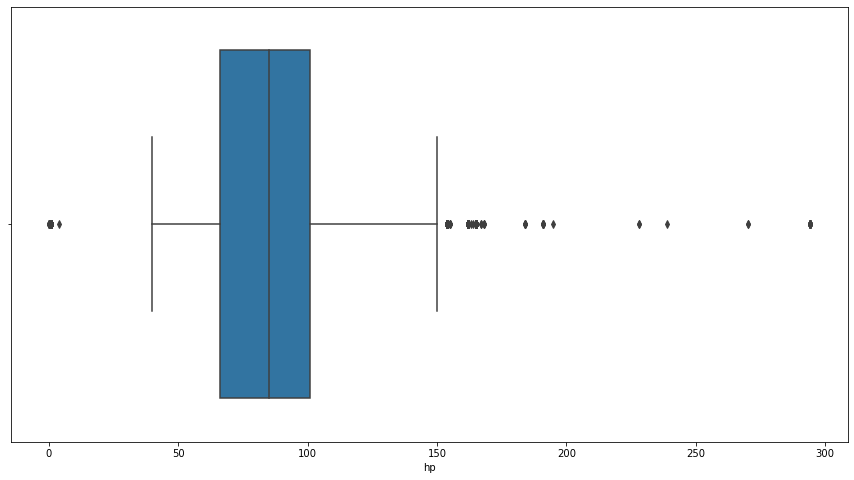

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['hp']);

In [25]:
df['hp'].sort_values().head(100)
## Many cars can have more hp than 300 but they can't have less hp than 40 so we will correct them

13474     0.0
13477     0.0
13476     0.0
13470     0.0
13475     0.0
13473     0.0
13471     0.0
13472     0.0
12385     1.0
9698      1.0
13939     1.0
12391     1.0
9692      1.0
9691      1.0
14053     1.0
12314     1.0
14037     1.0
9722      1.0
5476      1.0
14160     1.0
6521      1.0
13851     1.0
10250     1.0
12422     1.0
7553      1.0
10236     1.0
12433     1.0
12434     1.0
2292      1.0
12435     1.0
12436     1.0
12389     1.0
12307     1.0
13991     1.0
14125     1.0
13581     1.0
5500      1.0
13621     1.0
13666     1.0
13678     1.0
9347      1.0
11720     1.0
13690     1.0
13691     1.0
13774     1.0
12277     1.0
14104     1.0
11431     1.0
12254     1.0
13969     1.0
13973     1.0
12299     1.0
12300     1.0
14120     1.0
12302     1.0
13966     1.0
13965     1.0
13943     1.0
8513      1.0
9584      1.0
13942     1.0
12708     1.0
13533     1.0
6361      1.0
6363      1.0
8504      1.0
12500     1.0
14258     1.0
8506      1.0
12082     1.0
8503      1.0
12511 

In [26]:
df.groupby(['brand_model', 'body_type'])['hp'].transform(lambda x : x.replace([0,1,4],x.mode()[0]))

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
14371    165.0
14372    147.0
14373    165.0
14374    146.0
14375    165.0
Name: hp, Length: 14376, dtype: float64

In [27]:
df['hp']=df.groupby(['brand_model', 'body_type'])['hp'].transform(lambda x : x.replace([0,1,4],x.mode()[0]))

In [28]:
df['hp'].sort_values().head(60)

12528    40.0
8124     40.0
7687     44.0
9424     51.0
9427     51.0
9426     51.0
9425     51.0
8422     51.0
7963     51.0
7964     51.0
7965     51.0
7966     51.0
9423     51.0
7967     51.0
7968     51.0
9422     51.0
7969     51.0
7971     51.0
7972     51.0
7973     51.0
7975     51.0
7976     51.0
7979     51.0
7980     51.0
9420     51.0
9418     51.0
7981     51.0
7982     51.0
7983     51.0
7961     51.0
9428     51.0
9429     51.0
7957     51.0
9436     51.0
9435     51.0
7924     51.0
9434     51.0
9433     51.0
7926     51.0
7933     51.0
7934     51.0
7935     51.0
7936     51.0
7937     51.0
7938     51.0
7939     51.0
7940     51.0
9432     51.0
7941     51.0
7942     51.0
7943     51.0
7944     51.0
7945     51.0
7946     51.0
7947     51.0
7948     51.0
7949     51.0
9430     51.0
7950     51.0
7951     51.0
Name: hp, dtype: float64

In [29]:
df['hp'].describe()

count    14376.000000
mean        88.618322
std         26.522811
min         40.000000
25%         66.000000
50%         85.000000
75%        103.000000
max        294.000000
Name: hp, dtype: float64

In [30]:
df.select_dtypes('number').columns

Index(['price', 'age', 'km', 'prev_owner', 'hp', 'Consumption_comb', 'Consumption_city', 'Consumption_country', 'Nr. of Doors', 'Nr. of Seats', 'Displacement', 'Cylinders', 'Weight', 'CO2 Emission', 'Gears'], dtype='object')

## 'Consumption_comb'

In [31]:
df['Consumption_comb'].describe()

count    14376.000000
mean         4.848744
std          1.252085
min          2.000000
25%          4.000000
50%          4.800000
75%          5.500000
max         55.000000
Name: Consumption_comb, dtype: float64

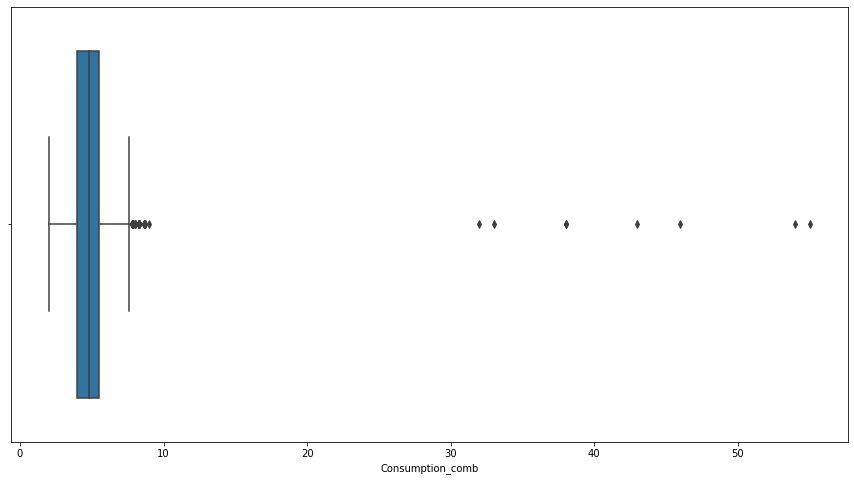

In [32]:
plt.figure(figsize = (15, 8))
sns.boxplot(x=df['Consumption_comb']);

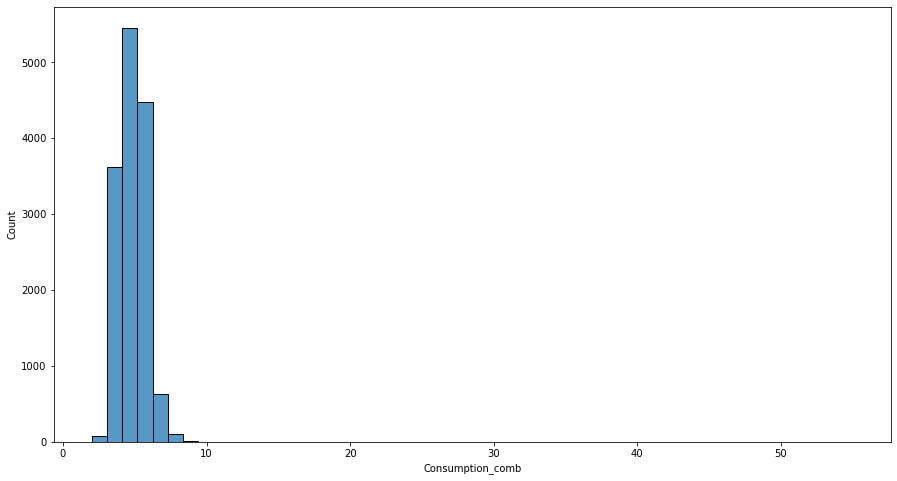

In [33]:
plt.figure(figsize=(15,8))
sns.histplot(x=df['Consumption_comb'],bins=50);

##### Most values have in the range of 0 to 10  but some have values more than 20, we need to fix that.

In [34]:
df['Consumption_comb'].sort_values().head(20) ##this part looks normal no need to change

12459    2.0
746      3.0
6140     3.0
12396    3.0
355      3.0
53       3.0
5413     3.0
4002     3.0
12308    3.0
10053    3.0
12072    3.0
2400     3.0
10096    3.0
12366    3.0
10106    3.0
12686    3.0
10135    3.0
12337    3.0
5595     3.0
5772     3.0
Name: Consumption_comb, dtype: float64

In [35]:
df['Consumption_comb'].sort_values().tail(20) 
##according to my research; if values have  that more than 10, they are outliers 

3270      8.3
3273      8.3
3269      8.3
3272      8.3
9893      8.6
11511     8.6
11533     8.6
11403     8.6
11058     8.7
11510     8.7
9921      8.7
9875      9.0
12865    32.0
13192    33.0
4189     38.0
4187     38.0
440      43.0
13630    46.0
12103    54.0
10959    55.0
Name: Consumption_comb, dtype: float64

In [36]:
comb_out=df.loc[df['Consumption_comb']>10,'Consumption_comb'].values
comb_out

array([43., 38., 38., 55., 54., 32., 33., 46.])

In [37]:
df['Consumption_comb'].sort_values().tail()

4187     38.0
440      43.0
13630    46.0
12103    54.0
10959    55.0
Name: Consumption_comb, dtype: float64

In [38]:
df['Consumption_comb']=df.groupby(['brand_model', 'body_type'])['Consumption_comb'].transform(lambda x : x.replace(comb_out,x.median()))

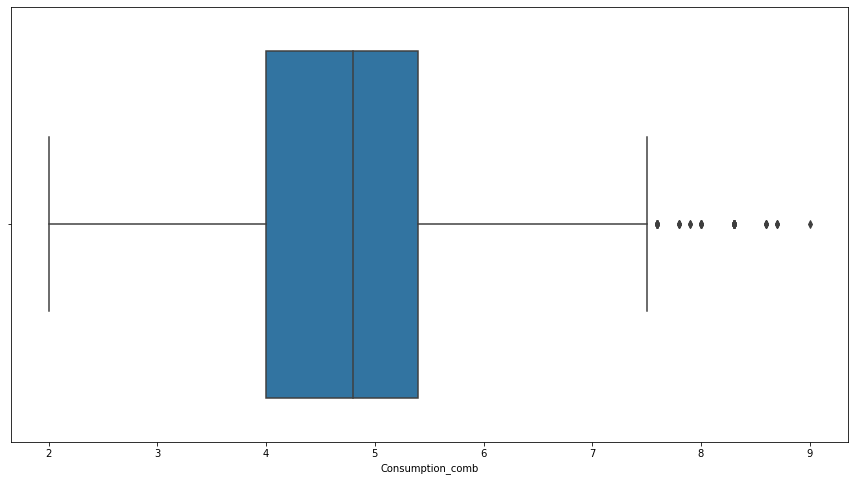

In [39]:
plt.figure(figsize = (15, 8))
sns.boxplot(x=df['Consumption_comb']);

## Consumption_city

In [40]:
df['Consumption_city'].sort_values().head(10)

11569    2.0
3283     2.0
11567    2.0
11563    2.0
11570    2.0
3282     2.0
11568    2.0
11511    2.0
11571    2.0
9893     2.0
Name: Consumption_city, dtype: float64

In [41]:
df['Consumption_city'].sort_values().tail(20)

474       9.9
6019      9.9
14297     9.9
14280     9.9
14294     9.9
5342      9.9
14291     9.9
14289     9.9
5469      9.9
14309     9.9
4187     43.0
4189     43.0
3754     45.0
3741     45.0
2035     62.0
2037     62.0
2050     62.0
2073     62.0
13244    64.0
8951     66.0
Name: Consumption_city, dtype: float64

In [42]:
df['Consumption_city'].describe()

count    14376.000000
mean         5.925083
std          1.860010
min          2.000000
25%          4.900000
50%          5.800000
75%          7.000000
max         66.000000
Name: Consumption_city, dtype: float64

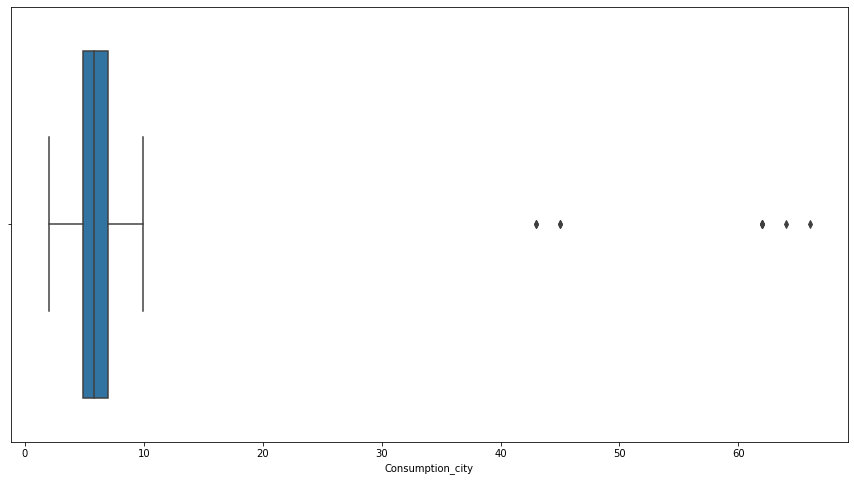

In [43]:
plt.figure(figsize = (15, 8))
sns.boxplot(x=df['Consumption_city']);

In [44]:
df['Consumption_city'].sort_values().head(10).index

Int64Index([11569, 3283, 11567, 11563, 11570, 3282, 11568, 11511, 11571, 9893], dtype='int64')

In [45]:
df.loc[df['Consumption_city'].sort_values().head(50).index]
# When we look at the data  values less than 3  and more than 20 are wrong.

,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,Gearing Type,hp,Consumption_comb,Consumption_city,Consumption_country,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras,Upholstery_type,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,CO2 Emission,Gears
11569,Opel Insignia,Station wagon,32995,0.0,1.000000,Benzine,Pre-registered,1.0,Black,Metallic,Automatic,147.0,6.5,2.0,7.7,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Adaptive Cruise Control, Blind spot monit...","Alloy wheels, Roof rack, Sport seats, Sport su...",Full leather,Black,VAT deductible,5.0,5.0,1598.0,4.0,1552.000000,front,172.0,6.0
3283,Audi A3,Sedans,41000,3.0,30000.000000,Benzine,Used,1.0,Blue,Metallic,Semi-automatic,270.0,8.0,2.0,6.3,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Digital radio, On-board computer","ABS, Adaptive Cruise Control, Alarm system, Ce...","Alloy wheels, Shift paddles, Sport package, Sp...",Cloth,Cloth,VAT undeductible,5.0,5.0,2480.0,5.0,1595.000000,front,189.0,7.0
11567,Opel Insignia,Station wagon,32995,0.0,1.000000,Benzine,Pre-registered,1.0,Grey,Metallic,Automatic,147.0,6.5,2.0,7.7,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Adaptive Cruise Control, Blind spot monit...","Alloy wheels, Roof rack, Sport seats, Sport su...",Full leather,Black,VAT deductible,5.0,5.0,1598.0,4.0,1552.000000,front,172.0,6.0
11563,Opel Insignia,Station wagon,32995,0.0,1.000000,Benzine,Used,1.0,Red,Metallic,Automatic,147.0,6.4,2.0,7.6,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Adaptive Cruise Control, Adaptive headlig...","Alloy wheels, Roof rack, Sport package, Sport ...",Part leather,Black,VAT deductible,5.0,5.0,1598.0,4.0,1552.000000,front,171.0,6.0
11570,Opel Insignia,Station wagon,32995,0.0,1.000000,Benzine,Pre-registered,1.0,Black,Metallic,Automatic,147.0,6.5,2.0,7.7,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Adaptive Cruise Control, Blind spot monit...","Alloy wheels, Roof rack, Sport seats, Sport su...",Full leather,Black,VAT deductible,5.0,5.0,1598.0,4.0,1552.000000,front,172.0,6.0
3282,Audi A3,Sedans,42500,3.0,37333.000000,Benzine,Used,1.0,Grey,Metallic,Semi-automatic,270.0,8.0,2.0,6.3,"Air conditioning, Seat ventilation, Split rear...",Bluetooth,"ABS, Alarm system, Central door lock, Driver-s...",Alloy wheels,Cloth,Cloth,Price negotiable,5.0,5.0,2480.0,5.0,1595.000000,front,189.0,7.0
11568,Opel Insignia,Station wagon,32995,0.0,1.000000,Benzine,Pre-registered,1.0,Black,Metallic,Automatic,147.0,6.5,2.0,7.7,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Adaptive Cruise Control, Blind spot monit...","Alloy wheels, Roof rack, Sport seats, Sport su...",Full leather,Black,VAT deductible,5.0,5.0,1598.0,4.0,1552.000000,front,172.0,6.0
11511,Opel Insignia,Station wagon,35380,0.0,2614.834179,Benzine,New,0.0,White,Metallic,Automatic,191.0,8.6,2.0,7.0,"Air conditioning, Automatic climate control, C...","Bluetooth, MP3, On-board computer, Radio","ABS, Central door lock, Daytime running lights...","Alloy wheels, Sport seats",Other,Black,VAT deductible,4.0,5.0,1490.0,4.0,1629.717452,4WD,197.0,6.0
11571,Opel Insignia,Station wagon,32995,0.0,1.000000,Benzine,Pre-registered,1.0,Grey,Metallic,Automatic,147.0,6.5,2.0,7.7,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Adaptive Cruise Control, Blind spot monit...","Alloy wheels, Roof rack, Sport seats, Sport su...",Full leather,Black,VAT deductible,5.0,5.0,1598.0,4.0,1552.000000,front,172.0,6.0
9893,Opel Insignia,Sedans,11600,2.0,68000.000000,Benzine,Used,1.0,White,Metallic,Automatic,191.0,8.6,2.0,4.5,"Air conditioning, Armrest, Automa

In [46]:
city_extrem=df.loc[(df['Consumption_city']<=3)|(df['Consumption_city']>20),'Consumption_city'].values
city_extrem

array([ 3., 62., 62., 62., 62.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  2.,  2.,  3.,  3.,  3., 45.,
       45., 43., 43., 66.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  3.,  3.,  3.,  3.,  3.,  3., 64.])

In [47]:
df['Consumption_city']=df.groupby(['brand_model', 'body_type'])['Consumption_city'].transform(lambda x : x.replace(city_extrem,x.median()))

In [48]:
df['Consumption_city'].sort_values()

12451    3.3
12512    3.3
12295    3.3
12220    3.3
12327    3.3
        ... 
5342     9.9
5469     9.9
14309    9.9
14291    9.9
14280    9.9
Name: Consumption_city, Length: 14376, dtype: float64

## Consumption_country

In [49]:
df['Consumption_country'].sort_values().head(10)

9456    2.0
3394    2.8
2693    2.8
3090    2.8
3057    2.8
3065    2.8
3070    2.8
3059    2.8
3025    2.8
3118    2.8
Name: Consumption_country, dtype: float64

In [50]:
df['Consumption_country'].sort_values().tail(10)

9860      8.6
4189     35.0
4187     35.0
3754     37.0
3741     37.0
13244    42.0
2073     44.0
2050     44.0
2037     44.0
2035     44.0
Name: Consumption_country, dtype: float64

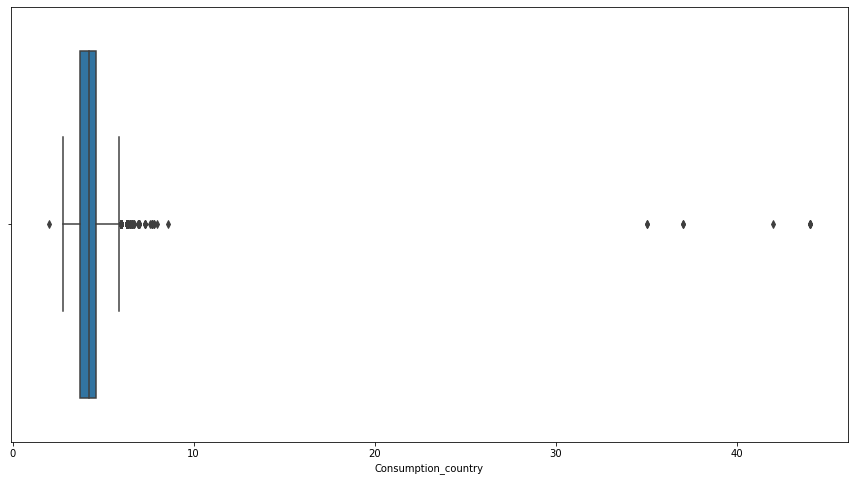

In [51]:
plt.figure(figsize = (15, 8))
sns.boxplot(x=df['Consumption_country']);

##### There are some values over 30, they are obviously wrong and we will fix them

In [52]:
country_extrem=df.loc[df['Consumption_country']>30,'Consumption_country'].values
country_extrem

array([44., 44., 44., 44., 37., 37., 35., 35., 42.])

In [53]:
df['Consumption_country']=df.groupby(['brand_model', 'body_type'])['Consumption_country'].transform(lambda x : x.replace(country_extrem,x.median()))

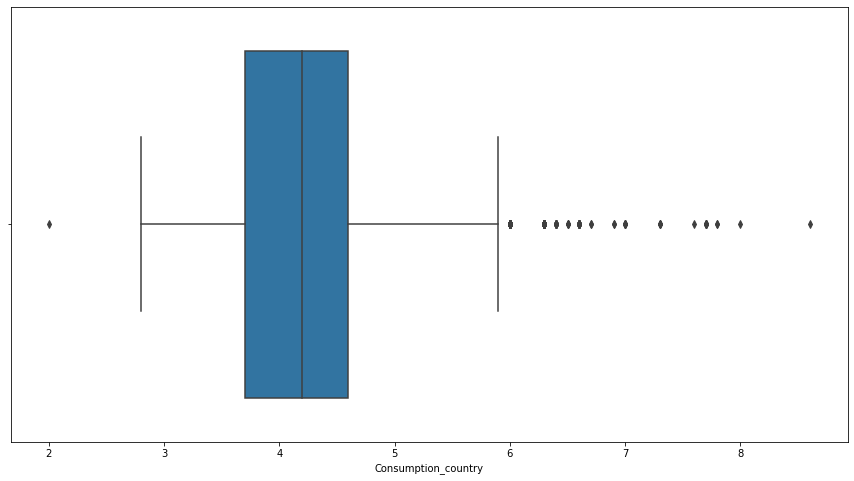

In [54]:
plt.figure(figsize = (15, 8))
sns.boxplot(x=df['Consumption_country']);

## Nr. of Doors

In [55]:
df['Nr. of Doors'].sort_values()

12550    1.0
8149     2.0
8118     2.0
7878     2.0
858      2.0
        ... 
5619     5.0
5621     5.0
5623     5.0
14375    5.0
13733    7.0
Name: Nr. of Doors, Length: 14376, dtype: float64

In [56]:
df.loc[df['Nr. of Doors']==1]


,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,Gearing Type,hp,Consumption_comb,Consumption_city,Consumption_country,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras,Upholstery_type,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,CO2 Emission,Gears
12550,Renault Clio,Compact,8500,3.0,41493.0,Diesel,Used,1.0,White,Metallic,Manual,55.0,5.2,6.8,4.5,"Air conditioning, Electrical side mirrors, Hil...","Bluetooth, Hands-free equipment, On-board comp...","ABS, Central door lock, Daytime running lights...",Alloy wheels,Cloth,Cloth,VAT deductible,1.0,5.0,1461.0,4.0,1130.701657,front,120.0,5.0


In [57]:
df.loc[df['Nr. of Doors']==7]

,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,Gearing Type,hp,Consumption_comb,Consumption_city,Consumption_country,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras,Upholstery_type,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,CO2 Emission,Gears
13733,Renault Espace,Van,21600,3.0,78000.0,Diesel,Used,1.0,Brown,Metallic,Automatic,118.0,4.6,5.0,4.4,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Digital radio, MP3, On-board comput...","ABS, Blind spot monitor, Central door lock, Da...","Alloy wheels, Touch screen",Full leather,Brown,Price negotiable,7.0,5.0,1598.0,4.0,1734.0,front,120.0,6.0


In [58]:
df.loc[(df['brand_model']=='Renault Espace')&(df['body_type']=='Van'),'Nr. of Doors'].value_counts()
## This car brand doesn't have 7-door or 1-door cars.

5.0    650
4.0     63
7.0      1
Name: Nr. of Doors, dtype: int64

In [59]:
df['Nr. of Doors']=df.groupby(['brand_model', 'body_type'])['Nr. of Doors'].transform(lambda x : x.replace([1,7],x.mode()[0]))

In [60]:
df.columns

Index(['brand_model', 'body_type', 'price', 'age', 'km', 'Fuel', 'Type', 'prev_owner', 'Body Color', 'Paint Type', 'Gearing Type', 'hp', 'Consumption_comb', 'Consumption_city', 'Consumption_country', 'Comfort & Convenience', 'Entertainment & Media', 'Safety & Security', 'Extras', 'Upholstery_type', 'Upholstery_color', 'vat', 'Nr. of Doors', 'Nr. of Seats', 'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'CO2 Emission', 'Gears'], dtype='object')

In [61]:
df['Nr. of Doors'].value_counts()

5.0    10614
4.0     2813
3.0      755
2.0      194
Name: Nr. of Doors, dtype: int64

## Nr. of Seats

In [62]:
df['Nr. of Seats'].sort_values()

7953     2.0
12857    2.0
12689    2.0
12317    2.0
13171    2.0
        ... 
14109    7.0
14108    7.0
14107    7.0
13846    7.0
13685    7.0
Name: Nr. of Seats, Length: 14376, dtype: float64

In [63]:
df['Nr. of Seats'].value_counts()

5.0    12900
4.0     1075
7.0      311
2.0       87
6.0        2
3.0        1
Name: Nr. of Seats, dtype: int64

In [64]:
df.loc[df['Nr. of Seats']==3]

,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,Gearing Type,hp,Consumption_comb,Consumption_city,Consumption_country,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras,Upholstery_type,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,CO2 Emission,Gears
1523,Audi A1,Compact,23090,1.0,9821.0,Benzine,Used,1.0,Black,Metallic,Automatic,141.0,5.8,7.4,4.9,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, Digital radio, Hands-fre...","ABS, Central door lock, Daytime running lights...","Alloy wheels, Catalytic Converter, Sport packa...",Part leather,Black,VAT undeductible,2.0,3.0,1798.0,4.0,1173.450766,front,134.0,7.0


In [65]:
df.loc[df['Nr. of Seats']==6]

,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,Gearing Type,hp,Consumption_comb,Consumption_city,Consumption_country,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras,Upholstery_type,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,CO2 Emission,Gears
519,Audi A1,Compact,13500,2.0,100000.000000,Benzine,Used,1.0,White,Metallic,Manual,70.0,4.4,5.4,3.9,Air conditioning,On-board computer,ABS,Alloy wheels,Cloth,Cloth,VAT deductible,5.0,6.0,1000.0,4.0,1500.0,front,104.0,5.0
14350,Renault Espace,Station wagon,42490,1.0,23805.815098,Diesel,New,0.0,Black,Metallic,Automatic,147.0,5.7,6.0,5.3,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, On-board comp...","ABS, Blind spot monitor, Central door lock, Da...","Alloy wheels, Touch screen",Cloth,Other,VAT deductible,5.0,6.0,1997.0,4.0,1840.0,front,168.0,6.0


In [66]:
## Number 3 and 6 doesn't match with their car brand ,we will fill them with mode.

In [67]:
df['Nr. of Seats']=df.groupby(['brand_model', 'body_type'])['Nr. of Seats'].transform(lambda x : x.replace([3,6],x.mode()[0]))

In [68]:
df['Nr. of Seats'].value_counts()

5.0    12903
4.0     1075
7.0      311
2.0       87
Name: Nr. of Seats, dtype: int64

## Displacement

In [69]:
df['Displacement'].sort_values().head()

2319    1000.0
7461    1000.0
6913    1000.0
7418    1000.0
1250    1000.0
Name: Displacement, dtype: float64

In [70]:
df['Displacement'].sort_values().tail()

3269     2480.0
3277     2480.0
9875     2967.0
6513     5898.0
10027    6000.0
Name: Displacement, dtype: float64

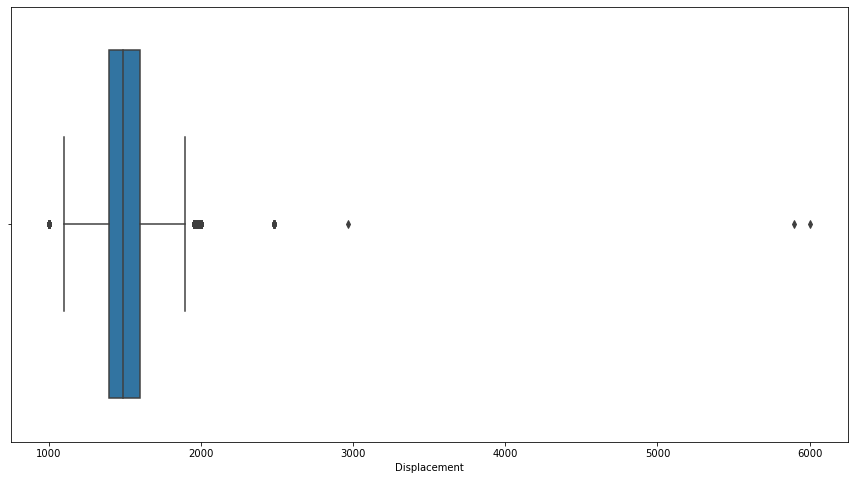

In [71]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Displacement']);

In [72]:
df['Displacement'].sort_values().tail(2).index

Int64Index([6513, 10027], dtype='int64')

In [73]:
df.iloc[10932]

brand_model                                                  Opel Insignia
body_type                                                    Station wagon
price                                                                23460
age                                                                    1.0
km                                                                 20300.0
Fuel                                                                Diesel
Type                                                                  Used
prev_owner                                                             1.0
Body Color                                                           Black
Paint Type                                                        Metallic
Gearing Type                                                     Automatic
hp                                                                   125.0
Consumption_comb                                                       5.7
Consumption_city         

In [74]:
df.iloc[df['Displacement'].sort_values().tail(2).index]

,brand_model,body_type,price,age,km,Fuel,Type,prev_owner,Body Color,Paint Type,Gearing Type,hp,Consumption_comb,Consumption_city,Consumption_country,Comfort & Convenience,Entertainment & Media,Safety & Security,Extras,Upholstery_type,Upholstery_color,vat,Nr. of Doors,Nr. of Seats,Displacement,Cylinders,Weight,Drive chain,CO2 Emission,Gears
6513,Opel Astra,Station wagon,18490,1.0,22327.0,Benzine,Employee's car,1.0,Green,Metallic,Automatic,100.0,4.5,5.7,3.8,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Central door lock, Daytime running lights...","Alloy wheels, Touch screen, Voice Control",Cloth,Black,VAT deductible,5.0,5.0,5898.0,4.0,1405.030466,front,119.0,6.0
10027,Opel Insignia,Station wagon,14300,3.0,76500.0,Diesel,Used,1.0,Grey,Metallic,Manual,88.0,5.6,7.3,4.6,"Air conditioning, Automatic climate control, C...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Central door lock, Daytime running lights...","Alloy wheels, Touch screen, Voice Control",Full leather,Black,Price negotiable,5.0,5.0,6000.0,4.0,1629.717452,front,139.5,6.0


#### No outliers other than the last two values

In [75]:
disp_extrem=df['Displacement'].sort_values().tail(2).values
disp_extrem

array([5898., 6000.])

In [76]:
df['Displacement']=df.groupby(['brand_model', 'body_type'])['Displacement'].transform(lambda x : x.replace(disp_extrem,x.mode()[0]))

In [77]:
df['Displacement'].sort_values()

2319    1000.0
7461    1000.0
6913    1000.0
7418    1000.0
1250    1000.0
         ...  
3267    2480.0
3266    2480.0
3277    2480.0
3274    2480.0
9875    2967.0
Name: Displacement, Length: 14376, dtype: float64

## Cylinders

In [78]:
df['Cylinders'].value_counts()

4.0    11365
3.0     2975
5.0       23
8.0        5
6.0        3
2.0        3
1.0        2
Name: Cylinders, dtype: int64

In [79]:
df['Cylinders'].sort_values().head(10)

9149     1.0
9150     1.0
14298    2.0
14299    2.0
10387    2.0
0        3.0
2340     3.0
2341     3.0
2342     3.0
2343     3.0
Name: Cylinders, dtype: float64

In [80]:
df['Cylinders'].sort_values().tail(10)

3274     5.0
3264     5.0
9875     6.0
11847    6.0
9930     6.0
475      8.0
474      8.0
13620    8.0
13621    8.0
476      8.0
Name: Cylinders, dtype: float64

In [81]:
##https://tr.wikipedia.org/wiki/Tek_silindirli_motor
## there is no single cylinder car engine,

In [82]:
df['Cylinders']=df.groupby(['brand_model', 'body_type'])['Cylinders'].transform(lambda x : x.replace([1],x.mode()[0]))

In [83]:
df['Cylinders'].value_counts()

4.0    11367
3.0     2975
5.0       23
8.0        5
6.0        3
2.0        3
Name: Cylinders, dtype: int64

In [84]:
df.select_dtypes('number').columns

Index(['price', 'age', 'km', 'prev_owner', 'hp', 'Consumption_comb', 'Consumption_city', 'Consumption_country', 'Nr. of Doors', 'Nr. of Seats', 'Displacement', 'Cylinders', 'Weight', 'CO2 Emission', 'Gears'], dtype='object')

## CO2 Emission

In [85]:
df['CO2 Emission'].sort_values().head(100)

9678      0.0
7501      0.0
13478     1.0
3741      1.0
5825      5.0
10577     5.0
11945     5.0
7817     12.0
5974     12.0
5303     12.0
11324    13.0
10895    14.0
7398     14.0
3286     36.0
3289     36.0
3291     36.0
11527    45.0
8992     51.0
7174     80.0
8141     82.0
8170     82.0
12342    82.0
12295    82.0
12921    82.0
12479    82.0
12509    82.0
8178     82.0
8177     82.0
12512    82.0
8139     82.0
12272    82.0
12881    82.0
12451    82.0
7859     82.0
12882    82.0
12719    82.0
12626    82.0
7840     82.0
12865    82.0
12492    82.0
7753     82.0
12488    82.0
12398    82.0
12883    82.0
7854     84.0
7843     84.0
12724    85.0
12469    85.0
12464    85.0
12450    85.0
12472    85.0
12453    85.0
12462    85.0
13256    85.0
12460    85.0
12458    85.0
12457    85.0
12452    85.0
13257    85.0
12463    85.0
12466    85.0
12441    85.0
12446    85.0
12406    85.0
12407    85.0
12408    85.0
12735    85.0
12409    85.0
12410    85.0
12412    85.0
12732    85.0
12414 

In [86]:
df['CO2 Emission'].sort_values().tail(50)

11450    187.0
11502    187.0
11501    187.0
11500    187.0
11891    187.0
11499    187.0
11540    187.0
11445    187.0
3273     188.0
13805    188.0
11557    188.0
11407    188.0
11964    188.0
3322     188.0
3274     188.0
3269     189.0
3272     189.0
3267     189.0
3261     189.0
3275     189.0
3266     189.0
3270     189.0
9853     189.0
3278     189.0
3276     189.0
9683     189.0
3284     189.0
3283     189.0
3282     189.0
3280     189.0
3323     189.0
3277     189.0
3279     189.0
9621     189.0
9661     190.0
14122    191.0
14157    193.0
9629     194.0
3264     194.0
14309    194.0
11533    197.0
9893     197.0
11511    197.0
11403    197.0
11510    199.0
11058    199.0
9875     239.0
9627     253.0
474      331.0
4187     990.0
Name: CO2 Emission, dtype: float64

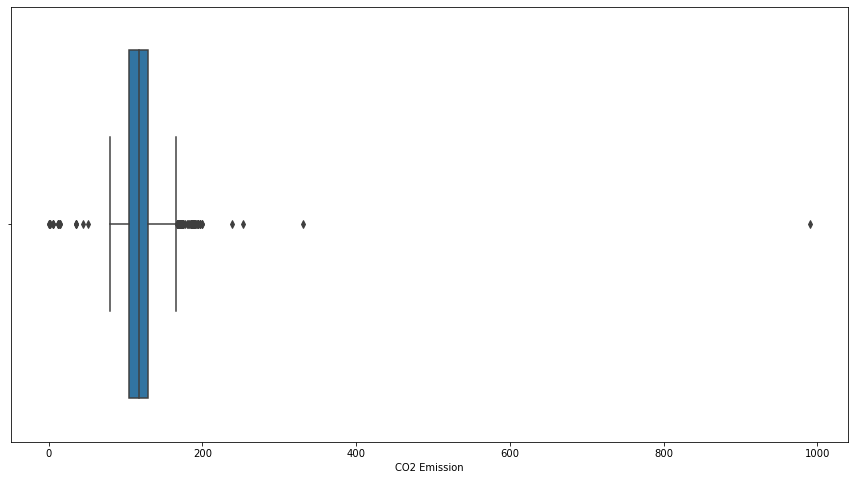

In [87]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['CO2 Emission']);

In [88]:
df['CO2 Emission'].describe()

count    14376.000000
mean       118.194213
std         19.463741
min          0.000000
25%        104.000000
50%        117.000000
75%        129.000000
max        990.000000
Name: CO2 Emission, dtype: float64

In [93]:
co2_extrem=df.loc[(df['CO2 Emission']<60)|(df['CO2 Emission']>300),'CO2 Emission'].values
co2_extrem

array([331.,  36.,  36.,  36.,   1., 990.,  12.,   5.,  12.,  14.,   0.,
        12.,  51.,   0.,   5.,  14.,  13.,  45.,   5.,   1.])

In [98]:
df['CO2 Emission']=df.groupby(['brand_model', 'body_type'])['CO2 Emission'].transform(lambda x: x.replace(co2_extrem,x.mean()))

In [100]:
df['CO2 Emission'].describe()

count    14376.000000
mean       118.252234
std         17.604912
min         80.000000
25%        104.000000
50%        117.000000
75%        129.000000
max        253.000000
Name: CO2 Emission, dtype: float64

## Weight

In [108]:
df['Weight'].describe()

count    14376.000000
mean      1359.884095
std        204.879613
min          1.000000
25%       1174.612691
50%       1329.515528
75%       1487.000000
max       2471.000000
Name: Weight, dtype: float64

In [106]:
df['Weight'].sort_values().tail(10)

13674    2410.0
13671    2410.0
13704    2410.0
13680    2410.0
9757     2450.0
9750     2450.0
13717    2471.0
13547    2471.0
13788    2471.0
14154    2471.0
Name: Weight, dtype: float64

In [107]:
df['Weight'].sort_values().head(10)

7634       1.0
11732      1.0
1066     102.0
8124     840.0
13017    900.0
12338    977.0
12375    977.0
12957    980.0
12694    980.0
12692    980.0
Name: Weight, dtype: float64

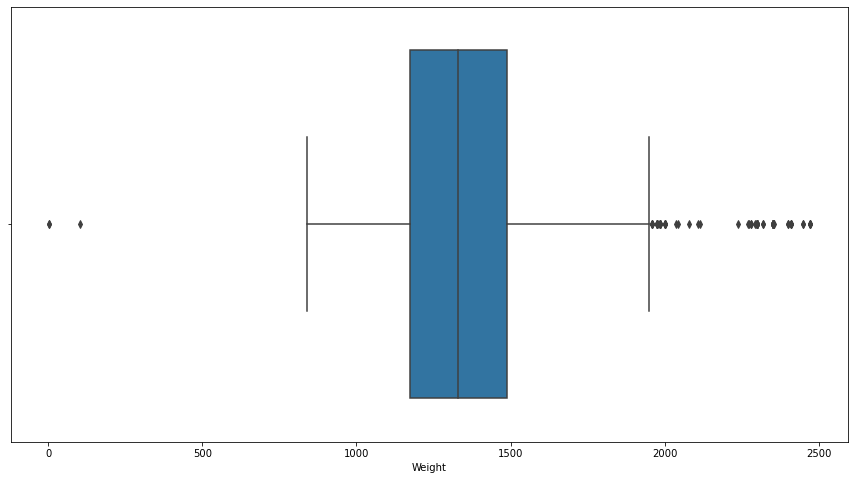

In [103]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Weight']);

In [ ]:
## Even the lightest car at least 800-kg , so we can conclude that cars less than 800-kg is outliers.

In [113]:
weight_extrem=df.loc[df['Weight']<800,'Weight'].values
weight_extrem

In [117]:
df['Weight']=df.groupby(['brand_model', 'body_type'])['Weight'].transform(lambda x: x.replace(weight_extrem,x.mean()))

In [120]:
df['Weight'].sort_values().head()

8124     840.0
13017    900.0
12375    977.0
12338    977.0
12957    980.0
Name: Weight, dtype: float64

## Gears

In [124]:
df['Gears'].sort_values().head(20)

13072    1.0
8187     1.0
9006     2.0
14282    3.0
14308    3.0
14287    4.0
5835     5.0
5846     5.0
9562     5.0
9555     5.0
5844     5.0
5843     5.0
5834     5.0
5842     5.0
9557     5.0
9561     5.0
5839     5.0
9558     5.0
9559     5.0
9560     5.0
Name: Gears, dtype: float64

In [125]:
df['Gears'].tail(10)

14366    6.0
14367    7.0
14368    7.0
14369    6.0
14370    6.0
14371    6.0
14372    6.0
14373    7.0
14374    6.0
14375    6.0
Name: Gears, dtype: float64

In [ ]:
##  According to our domain knowledge, cars in the dataset have at least (5+1)-gears 
##   so if cars have less than 6-gears they are outliers

In [157]:
gears_extream=df.loc[(df['Gears']<5) |(df['Gears']>9),'Gears'].values

In [159]:
df['Gears']=df.groupby(['brand_model', 'body_type'])['Gears'].transform(lambda x: x.replace(gears_extream,x.mode()[0]))

In [160]:
df['Gears'].sort_values().head(10)

4016    5.0
9554    5.0
9555    5.0
5846    5.0
9556    5.0
5844    5.0
5843    5.0
5842    5.0
5849    5.0
9557    5.0
Name: Gears, dtype: float64

In [163]:
df['Gears'].sort_values().tail(10)

10850    8.0
10847    8.0
10842    8.0
10831    8.0
10871    8.0
11451    8.0
14332    9.0
14288    9.0
14339    9.0
14278    9.0
Name: Gears, dtype: float64

In [164]:
df.isnull().sum()

brand_model              0
body_type                0
price                    0
age                      0
km                       0
Fuel                     0
Type                     0
prev_owner               0
Body Color               0
Paint Type               0
Gearing Type             0
hp                       0
Consumption_comb         0
Consumption_city         0
Consumption_country      0
Comfort & Convenience    0
Entertainment & Media    0
Safety & Security        0
Extras                   0
Upholstery_type          0
Upholstery_color         0
vat                      0
Nr. of Doors             0
Nr. of Seats             0
Displacement             0
Cylinders                0
Weight                   0
Drive chain              0
CO2 Emission             0
Gears                    0
dtype: int64

In [166]:
df.to_csv('outliers_scout_auto.csv',index=False)